In [20]:
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [21]:
'''
获取数据
'''
import os
import pandas as pd
def load_housing_data():
    
    return pd.read_csv("housing.csv")



housing = load_housing_data()

In [22]:
# 查看前五行的数据 每一行代表一个区
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [23]:
# info方法获取数据集的简单描述
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [24]:
# 查看 ocean_proximity 属性有多少中分类存在
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [25]:
# describe 显示数值属性的摘要
# std 标准差（用来测量数值的离散程度）
# 25%、50%和75%行显示相应的百分位数：百分位数表示一组观测值
# 中给定百分比的观测值都低于该值。例如，对于housing_median_age
# 的值，25%的区域低于18，50%的区域低于29，以及75%的区域低于
# 37。这些通常被称为：百分之二十五分位数（或者第一四分位数）、
# 中位数以及百分之七十五分位数（或者第三四分位数）。
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


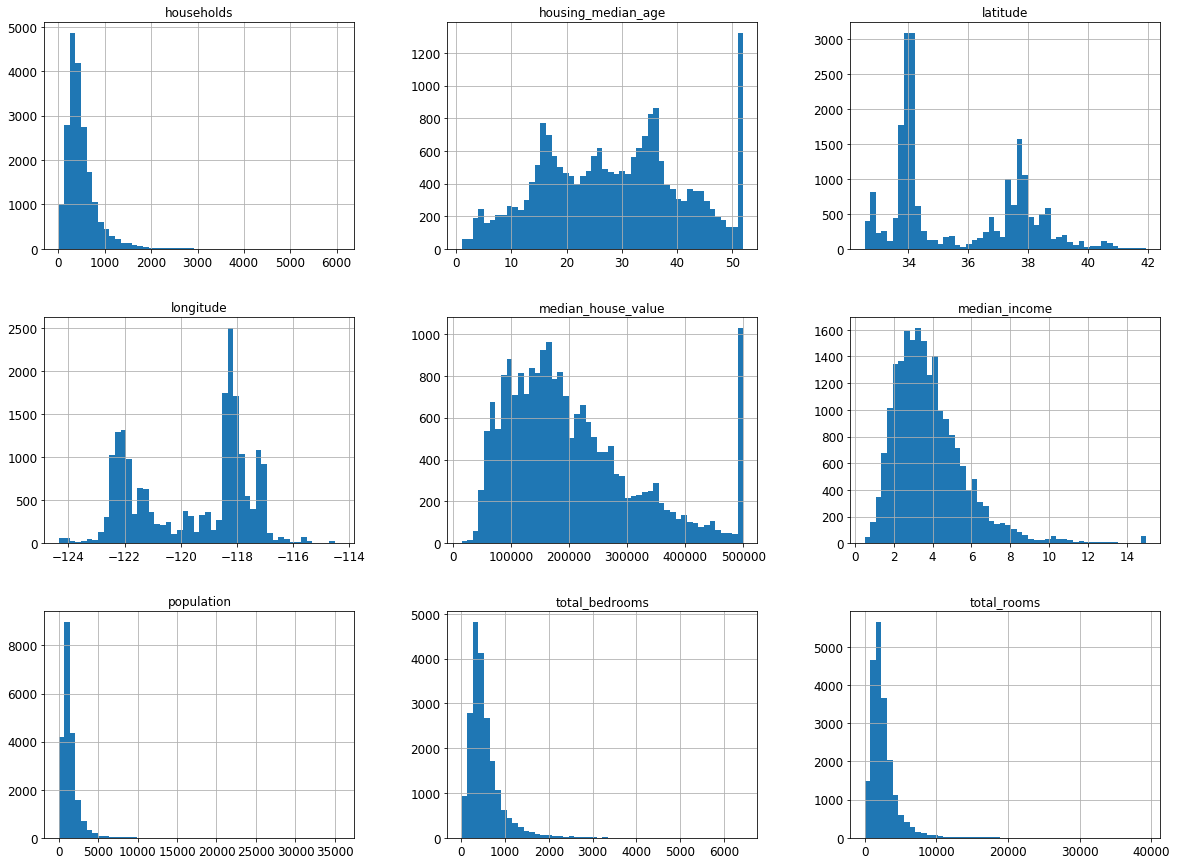

In [26]:
# 绘制直方图

%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

# 直方图 看出的问题
# 1.首先，收入中位数这个属性看起来不像是用美元（USD）在衡
# 量。经与收集数据的团队核实，你得知数据已经按比例缩小，并框出
# 中位数的上限为15（实际为15.0001），下限为0.5（实际为
# 0.4999）。在机器学习中，使用经过预处理的属性是很常见的事情，
# 倒不一定是个问题，但是你至少需要了解数据是如何计算的。
# 2.房龄中位数和房价中位数也被设定了上限。而后者正是你的目
# 标属性（标签），这可是个大问题。因为你的机器学习算法很可能会
# 学习到价格永远不会超过这个限制。所以你需要再次与客户（使用你
# 系统的输出的团队）进行核实，查看是否存在问题。如果他们告诉
# 你，他们需要精确的预测值，甚至可以超过50万美元，那么，通常你
# 有两个选择：
# a.对那些标签值被设置了上限的地区，重新收集标签值。
# b.或是将这些地区的数据从训练集中移除（包括从测试集中移
# 除，因为如果预测值超过500000，系统不应被评估为不良）。
# 3.这些属性值被缩放的程度各不相同。这点将在本章后文探索特
# 征的缩放时，再做讨论。
# 4.最后，许多直方图都表现出重尾：图形在中位数右侧的延伸比
# 左侧要远得多。这可能会导致某些机器学习算法难以检测模式。稍后
# 我们会尝试一些转化方法，将这些属性转化为更偏向钟形的分布


In [27]:
# 开始创建测试集

import numpy as np
np.random.seed(42)

In [28]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [29]:
# 常见的解决办法是每个实例都使用一个标识符（identifier）来决定是否
# 进入测试集（假定每个实例都有一个唯一且不变的标识符）。举例来
# 说，你可以计算每个实例标识符的hash值，只取hash的最后一个字
# 节，如果该值小于等于51（约256的20%），则将该实例放入测试
# 集。这样可以确保测试集在多个运行里都是一致的，即便更新数据集
# 也仍然一致。新实例的20%将被放入新的测试集，而之前训练集中的
# 实例也不会被放入新测试集。

import hashlib
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio
def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]


# 不幸的是，housing数据集没有标识符列。最简单的解决方法是
# 使用行索引作为ID：

housing_with_id = housing.reset_index() # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

# 如果使用行索引作为唯一标识符，你需要确保在数据集的末尾添
# 加新数据，并且不会删除任何行。如果不能保证这点，那么你可以尝
# 试使用某个最稳定的特征来创建唯一标识符。例如，一个地区的经纬
# 度肯定几百万年都不会变，所以你可以将它们组合成如下的ID
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")


In [30]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [31]:
# Scikit-Learn提供了一些函数，可以通过多种方式将数据集分成多
# 个子集。最简单的函数是train_test_split，它与前面定义的函数
# split_train_test几乎相同，除了几个额外特征。首先，它也有
# random_state参数，让你可以像之前提到过的那样设置随机生成器种
# 子；其次，你可以把行数相同的多个数据集一次性发送给它，它会根
# 据相同的索引将其拆分
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [32]:
test_set.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


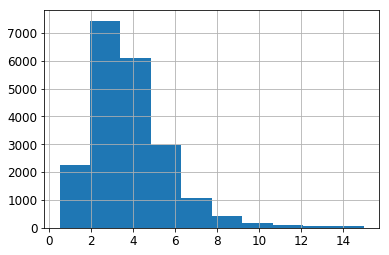

In [33]:
housing["median_income"].hist()



In [34]:
# 大多数收入中位数值聚集在2～5（万美元）左右，但也有一部分
# 远远超过了6万。在数据集中，每一层都要有足够数量的实例，这一
# 点至关重要，不然数据不足的层，其重要程度很有可能会被错估。也
# 就是说，你不应该将层数分得太多，每一层应该要足够大才行。下面
# 这段代码是这样创建收入类别属性的：将收入中位数除以1.5（限制
# 收入类别的数量），然后使用ceil进行取整（得到离散类别），最后
# 将所有大于5的类别合并为类别5：
# Divide by 1.5 to limit the number of income categories
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
# Label those above 5 as 5
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)



In [35]:
# 现在，你可以根据收入类别进行分层抽样了。使用Scikit-Learn的
# Stratified-Shuffle Split类：
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [36]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [37]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100


In [38]:
# 使用类似代码你还可以测量测试集中的收入类别比例分布。图2-
# 10比较了在三种不同的数据集（完整数据集、分层抽样的测试集、纯
# 随机抽样的测试集）中收入类别的比例分布。正如你所见，分层抽样
# 的测试集中的比例分布与完整数据集中的分布几乎一致，而纯随机抽
# 样的测试集结果则出现了重大偏离
compare_props

,Overall,Random,Stratified,Rand. %error,Strat. %error
1.0,0.039826,0.040213,0.039729,0.973236,-0.243309
2.0,0.318847,0.324370,0.318798,1.732260,-0.015195
3.0,0.350581,0.358527,0.350533,2.266446,-0.013820
4.0,0.176308,0.167393,0.176357,-5.056334,0.027480
5.0,0.114438,0.109496,0.114583,-4.318374,0.127011


In [39]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [40]:
# 先创建一个副本，这样可以随便尝试而不损害训
# 练集：
housing = strat_train_set.copy()



Saving figure californ


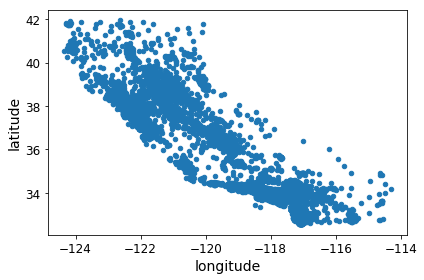

In [41]:

# 由于存在地理位置信息（经度和纬度），因此建立一个各区域的
# 分布图以便于数据可视化是一个很好的想法
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("californ")

Saving figure californ


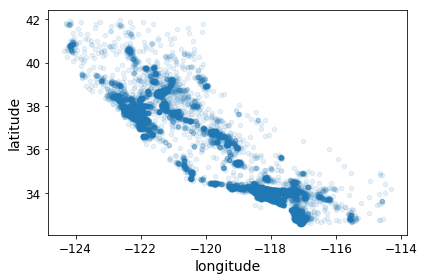

In [42]:
# 没错，这除了看起来跟加利福尼亚州一样以外，很难再看出任何
# 其他的模式。将alpha选项设置为0.1，可以更清楚地看出高密度数据
# 点的位置
housing.plot(kind="scatter", x="longitude", y="latitude",alpha=0.1)
save_fig("californ")

# 现在好多了：可以清楚地看到高密度地区，也就是湾区、洛杉矶
# 和圣地亚哥附近，同时在中央山谷有一条相当高密度的长线，特别是
# 萨克拉门托和弗雷斯诺附近。



现在，再来看看房价。每个圆的半径大小代表了每
个地区的人口数量（选项s），颜色代表价格（选项c）。我们使用一
个名叫jet的预定义颜色表（选项cmap）来进行可视化，颜色范围从
蓝（低）到红（高）

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

save_fig("housing_prices_scatterplot")
这张图片告诉你房屋价格与地理位置（例如靠海）和人口密度息
息相关，这点你可能早已知晓。一个通常很有用的方法是，使用聚类
算法来检测主群体，然后再为各个聚类中心添加一个新的衡量邻近距
离的特征。海洋邻近度可能就是一个很有用的属性，不过在北加州，
沿海地区的房价并不是太高，所以这个简单的规则也不是万能的。

In [65]:
# 寻找相关性
# 由于数据集不大，你可以使用corr（）方法轻松计算出每对属性
# 之间的标准相关系数（也称为皮尔逊相关系数）：
corr_matrix = housing.corr()
print(corr_matrix)
corr_matrix["median_house_value"].sort_values(ascending=False)
# 关系数的范围从-1变化到1。越接近1，表示有越强的正相关；
# 比如，当收入中位数上升时，房价中位数也趋于上升。当系数接近
# 于-1，则表示有强烈的负相关；注意看纬度和房价中位数之间呈现出
# 轻微的负相关（也就是说，越往北走，房价倾向于下降）。最后，系
# 数靠近0则说明二者之间没有线性相关性。



                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924478           -0.105848     0.048871   
latitude            -0.924478  1.000000            0.005766    -0.039184   
housing_median_age  -0.105848  0.005766            1.000000    -0.364509   
total_rooms          0.048871 -0.039184           -0.364509     1.000000   
total_bedrooms       0.076598 -0.072419           -0.325047     0.929379   
population           0.108030 -0.115222           -0.298710     0.855109   
households           0.063070 -0.077647           -0.306428     0.918392   
median_income       -0.019583 -0.075205           -0.111360     0.200087   

                    total_bedrooms  population  households  median_income  
longitude                 0.076598    0.108030    0.063070      -0.019583  
latitude                 -0.072419   -0.115222   -0.077647      -0.075205  
housing_median_age       -0.325047   -0.298710   -0.306428      -0.111360  
total_rooms

KeyError: 'median_house_value'

In [45]:
# 还有一种方法可以检测属性之间的相关性，就是使用Pandas的
# scatter_matrix函数，它会绘制出每个数值属性相对于其他数值属性的
# 相关性。现在我们有个数值属性，可以得到112＝121个图形，篇幅原
# 因无法完全展示，这里我们仅关注那些与房价中位数属性最相关的，
# 可算作是最有潜力的属性
# from pandas.tools.plotting import scatter_matrix
# attributes = ["median_house_value", "median_income", "total_rooms",
# "housing_median_age"]
# scatter_matrix(housing[attributes], figsize=(12, 8))

[0, 16, 0, 550000]

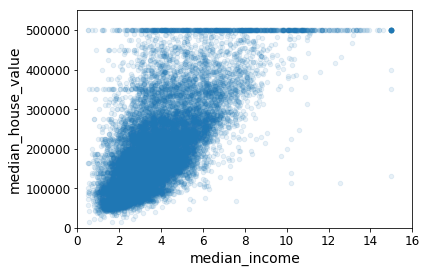

In [46]:
# 最有潜力能够预测房价中位数的属性是收入中位数，所以我们放
# 大来看看其相关性的散点图

housing.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)
plt.axis([0, 16, 0, 550000])

# 上图说明了几个问题。首先，二者相关性确实很强，你可以清
# 楚地看到上升的趋势，并且点也不是太分散。其次，前面我们提到过
# 50万美元的价格上限在图中是一条清晰的水平线，不过除此以外，这
# 张图还显示出几条不那么明显的直线：45万美元附近有一条水平线，
# 35万美元附近也有一条，28万美元附近似乎隐约也有一条，再往下可
# 能还有一些。为了避免你的算法学习之后重现这些怪异数据，你可能
# 会尝试删除这些相应地区。

In [47]:
# 验不同属性的组合
# 通过前面的章节，希望让你了解到了一些探索数据并从中获得洞
# 察的方法。在准备开始给机器学习的算法输入数据之前，你可能识别
# 出了一些异常数据，需要提前清理掉；同时，说不定你还发现了不同
# 属性之间的某些有趣联系，特别是跟目标属性相关的联系；再有，你
# 还可能注意到某些属性的分布显示出了明显的“重尾”分布，于是你还
# 需要对它们进行转换处理（例如，计算其对数）。当然了，每个项目
# 的历程都不一样，但是大致思路都相似。


# 在准备给机器学习算法输入数据之前，你要做的最后一件事应该
# 是尝试各种属性的组合。比如，如果你不知道一个地区有多少个家
# 庭，那么知道一个地区的“房间总数”也没什么用。你真正想要知道的
# 是一个家庭的房间数量。同样地，单看“卧室总数”这个属性本身，也
# 没什么意义，你可能是想拿它和“房间总数”来对比，或者拿来同“每
# 个家庭的人口数”这个属性结合也似乎挺有意思。我们来试着创建这
# 些新属性：
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]
# 然后再来看看关联矩阵：
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

# 新的属性bedrooms_per_room较之“房间总
# 数”或是“卧室总数”与房价中位数的相关性都要高得多。显然卧室/房
# 间比例更低的房屋，往往价格更贵。同样“每个家庭的房间数量”也
# 比“房间总数”更具信息量——房屋越大，价格越贵。


median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [81]:
机器学习算法的数据准备

先回到一个干净的数据集（再次复制
strat_train_set），然后将预测器和标签分开，因为这里我们不一定对
它们使用相同的转换方式（需要注意drop（）会创建一个数据副本，
但是不影响strat_train_set）：


In [82]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()


In [ ]:
数据清理

大部分的机器学习算法无法在缺失的特征上工作，所以我们要创
建一些函数来辅助它。前面我们已经注意到total_bedrooms属性有部
分值缺失，所以我们要解决它。有以下三种选择：
·放弃这些相应的地区
·放弃这个属性
·将缺失的值设置为某个值（0、平均数或者中位数等都可以）
通过DataFrame的dropna（）、drop（）和fillna（）方法，可以
轻松完成这些操作：

In [83]:
housing.dropna(subset=["total_bedrooms"]) # option 1
housing.drop("total_bedrooms", axis=1) # option 2
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median) # option 3


17606     351.0
18632     108.0
14650     471.0
3230      371.0
3555     1525.0
19480     588.0
8879      317.0
13685     293.0
4937      465.0
4861      229.0
16365     951.0
19684     559.0
19234     501.0
13956     582.0
2390      495.0
11176     649.0
15614     545.0
2953      251.0
13209     409.0
6569      261.0
5825      913.0
18086     538.0
16718     945.0
13600     278.0
13989     444.0
15168     190.0
6747      563.0
7398      366.0
5562      133.0
16121     416.0
          ...  
12380     767.0
5618       24.0
10060     539.0
18067     438.0
4471      797.0
19786     300.0
9969      393.0
14621    1051.0
579       302.0
11682    1615.0
245       460.0
12130     537.0
16441     544.0
11016     428.0
19934     422.0
1364       34.0
1236      829.0
5364      272.0
11703     300.0
10356     449.0
15270     515.0
3754      373.0
12166     756.0
6003      932.0
7364      212.0
6563      236.0
12053     294.0
13908     872.0
11159     380.0
15775     682.0
Name: total_bedrooms, Le

如果你选择方法3，你需要计算出训练集的中位数值，然后用它
填充训练集中的缺失值，但也别忘了保存这个计算出来的中位数值，
因为后面可能需要用到。比如重新评估系统时，你需要更换测试集中
的缺失值；或者在系统上线时，需要使用新数据替代缺失值。


Scikit-Learn提供了一个非常容易上手的教程来处理缺失值：
imputer。使用方法如下，首先，你需要创建一个imputer实例，指定
你要用属性的中位数值替换该属性的缺失值：

In [84]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")

由于中位数值只能在数值属性上计算，所以我们需要创建一个没
有文本属性的数据副本ocean_proximity：

In [85]:
housing_num = housing.drop("ocean_proximity", axis=1)
# 使用fit（）方法将imputer实例适配到训练集：
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

这里imputer仅仅只是计算了每个属性的中位数值，并将结果存
储在其实例变量statistics_中。虽然只有total_bedrooms这个属性存在
缺失值，但是我们无法确认系统启动之后新数据中是否一定不存在任
何缺失值，所以稳妥起见，还是将imputer应用于所有的数值属性：

In [86]:
imputer.statistics_
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

现在，你可以使用这个“训练有素”的imputer将缺失值替换成中位
数值完成训练集转换：

In [90]:
X = imputer.transform(housing_num)
print(X)

[[-121.89     37.29     38.     ...  710.      339.        2.7042]
 [-121.93     37.05     14.     ...  306.      113.        6.4214]
 [-117.2      32.77     31.     ...  936.      462.        2.8621]
 ...
 [-116.4      34.09      9.     ... 2098.      765.        3.2723]
 [-118.01     33.82     31.     ... 1356.      356.        4.0625]
 [-122.45     37.77     52.     ... 1269.      639.        3.575 ]]


结果是一个包含转换后特征的Numpy数组。如果你想要将它放回
Pandas DataFrame，也很简单：

In [89]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
print(housing_tr)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -121.89     37.29                38.0       1568.0           351.0   
1        -121.93     37.05                14.0        679.0           108.0   
2        -117.20     32.77                31.0       1952.0           471.0   
3        -119.61     36.31                25.0       1847.0           371.0   
4        -118.59     34.23                17.0       6592.0          1525.0   
5        -120.97     37.66                24.0       2930.0           588.0   
6        -118.50     34.04                52.0       2233.0           317.0   
7        -117.24     34.15                26.0       2041.0           293.0   
8        -118.26     33.99                47.0       1865.0           465.0   
9        -118.28     34.02                29.0        515.0           229.0   
10       -121.31     38.02                24.0       4157.0           951.0   
11       -121.62     39.14                41.0      

处理文本和分类属性
之前我们排除了分类属性ocean_proximity，因为它是一个文本属
性，我们无法计算它的中位数值。大部分的机器学习算法都更易于跟
数字打交道，所以我们先将这些文本标签转化为数字。
Scikit-Learn为这类任务提供了一个转换器LabelEncoder：

In [91]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3], dtype=int64)

现在好了：我们可以将这套数值数据应用于任意机器学习算法。
你可以使用classes_属性来查看这个编码器已学习的映射（“<1H
OCEAN”对应为0，“INLAND”对应为1，等等）：

In [92]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


这种代表方式产生的一个问题是，机器学习算法会以为两个相近
的数字比两个离得较远的数字更为相似一些。显然，真实情况并非如
此（比如，类别0和类别4之间就比类别0和类别1之间的相似度更
高）。为了解决这个问题，常见的解决方案是给每个类别创建一个二
进制的属性：当类别是“<1H  OCEAN”时，一个属性为1（其他为
0），当类别是“INLAND”时，另一个属性为1（其他为0），以此类
推。这就是独热编码，因为只有一个属性为1（热），其他均为
0（冷）。

Scikit-Learn提供了一个OneHotEncoder编码器，可以将整数分类
值转换为独热向量。我们用它来将类别编码为独热向量。值得注意的
是，fit_transform（）需要一个二维数组，但是housing_cat_encoded是
一个一维数组，所以我们需要将它重塑

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot


注意到这里的输出是一个SciPy稀疏矩阵，而不是一个NumPy数
组。当你有成千上万种类别的分类属性时，这个函数会非常有用。因
为当独热编码完成之后，我们会得到一个几千列的矩阵，并且全是
0，每行仅有一个1。占用大量内存来存储0是一件非常浪费的事情，
因此稀疏矩阵选择仅存储非零元素的位置。而你依旧可以像使用一个
普通的二维数组那样来使用它， [4] 当然如果你实在想把它转换成一个
（密集的）NumPy数组，只需要调用toarray（）方法即可：

In [ ]:
housing_cat_1hot.toarray()

使用LabelBinarizer类可以一次性完成两个转换（从文本类别转化
为整数类别，再从整数类别转换为独热向量）：


In [ ]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot


注意，这时默认返回的是一个密集的NumPy数组。通过发送
sparse_output=True给LabelBinarizer构造函数，可以得到稀疏矩阵。


自定义转换器
虽然Scikit-Learn已经提供了许多有用的转换器，但是你仍然需要
为一些诸如自定义清理操作或是组合特定属性等任务编写自己的转换
器。你当然希望让自己的转换器与Scikit-Learn自身的功能（比如流水
线）无缝衔接，而由于Scikit-Learn依赖于鸭子类型（duck typing）的
编译，而不是继承，所以你所需要的只是创建一个类，然后应用以下
三个方法：fit（）（返回自身）、transform（）、fit_transform（）。
如果添加TransformerMixin作为基类，就可以直接得到最后一个方
法。同时，如果添加BaseEstimator作为基类（并在构造函数中避免
*args和**kargs），你还能额外获得两个非常有用的自动调整超参数
的方法（get_params（）和set_params（））。例如，我们前面讨论
过的组合属性，这里有个简单的转换器类，用来添加组合后的属性


**尽管sklearn提供了强大的数据处理功能，有些时候我们需要根据自己的需求自定义一些数据预处理方法，并且让我们这些操作有着sklearnAPI相似的用法，我们所需要做的就是继承BaseEstimator类，并覆写三个方法fit，transform和fit_transform，第三个方法是前两个的整合，如果不想覆写fit_transform,可以继承TransformerMixin(从类名称就可以看出其作用)这个类**

In [93]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

上面定义的类的功能是为原数据集添加新的特征，X[:,3]表示的是第4列所有数据，np.c_表示的是拼接数组。
另外sklearn是不能直接处理DataFrames的，那么我们需要自定义一个处理的方法将之转化为numpy类型

在本例中，转换器有一个超参数add_bedrooms_per_room默认设
置为True（提供合理的默认值通常是很有帮助的）。这个超参数可以
让你轻松知晓添加这个属性是否有助于机器学习的算法。更广泛地
说，如果你对数据准备的步骤没有充分的信心，就可以添加这个超参
数来进行把关。这些数据准备步骤的执行越自动化，你自动尝试的组
合也就越多，从而有更大可能从中找到一个重要的组合（还节省了大
量时间）。
特征缩放
最重要也最需要应用到数据上的转换器，就是特征缩放。如果输
入的数值属性具有非常大的比例差异，往往导致机器学习算法的性能
表现不佳，当然也有极少数特例。案例中的房屋数据就是这样：房间
总数的范围从6到39320，而收入中位数的范围是0到15。注意，目标
值通常不需要缩放。
同比例缩放所有属性，常用的两种方法是：最小-最大缩放和标
准化。
最小-最大缩放（又叫作归一化）很简单：将值重新缩放使其最
终范围归于0到1之间。实现方法是将值减去最小值并除以最大值和最
小值的差。对此，Scikit-Learn提供了一个名为MinMaxScaler的转换
器。如果出于某种原因，你希望范围不是0～1，你可以通过调整超参
数feature_range进行更改。
标准化则完全不一样：首先减去平均值（所以标准化值的均值总
是零），然后除以方差，从而使得结果的分布具备单位方差。不同于
最小-最大缩放的是，标准化不将值绑定到特定范围，对某些算法而
言，这可能是个问题（例如，神经网络期望的输入值范围通常是0到
1）。但是标准化的方法受异常值的影响更小。例如，假设某个地区
的平均收入等于100（错误数据）。最小-最大缩放会将所有其他值从
0～15降到0～0.15，而标准化则不会受到很大影响。Scikit-Learn提供
了一个标准化的转换器StandadScaler。

转换流水线
正如你所见，许多数据转换的步骤需要以正确的顺序来执行。而
Scikit-Learn正好提供了Pipeline来支持这样的转换。下面是一个数值
属性的流水线例子：

In [94]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
('imputer', Imputer(strategy="median")),
('attribs_adder', CombinedAttributesAdder()),
('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)


另外sklearn是不能直接处理DataFrames的，那么我们需要自定义一个处理的方法将之转化为numpy类型


In [96]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

Pipeline构造函数会通过一系列名称/估算器的配对来定义步骤的
序列。除了最后一个是估算器之外，前面都必须是转换器（也就是
说，必须有fit_transform（）方法）。至于命名，可以随意，你喜欢
就好。
当调用流水线的fit（）方法时，会在所有转换器上按照顺序依次
调用fit_transform（），将一个调用的输出作为参数传递给下一个调
用方法，直到传递到最终的估算器，则只会调用fit（）方法。
流水线的方法与最终的估算器的方法相同。在本例中，最后一个
估算器是StandardScaler，这是个转换器，因此Pipeline有
transform（）方法可以按顺序将所有的转换应用到数据中（如果不希
望先调用fit（）再调用transform（），也可以直接调用
fit_transform（）方法）。
现在，你已经有了一个处理数值的流水线，接下来你需要在分类
值上应用LabelBinarizer：不然怎么将这些转换加入单个流水线中？
Scikit-Learn为此特意提供了一个FeatureUnion类。你只需要提供一个
转换器列表（可以是整个转换器流水线），当transform（）方法被调
用时，它会并行运行每个转换器的transform（）方法，等待它们的输
出，然后将它们连结起来，返回结果（同样地，调用fit（）方法也会
调用每个转换器的fit（）方法）。一个完整的处理数值和分类属性的
流水线可能如下所示：

In [55]:
from sklearn.base import TransformerMixin #gives fit_transform method for free
class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)

In [98]:
# from sklearn.pipeline import FeatureUnion
num_attribs = list(housing_num)
# cat_encoder = CategoricalEncoder(encoding="onehot-dense")
cat_attribs = ["ocean_proximity"]
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])
print(DataFrameSelector(num_attribs))

# cat_pipeline = Pipeline([
#         ('selector', DataFrameSelector(cat_attribs)),
#         ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
#     ])
print(DataFrameSelector(cat_attribs))
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', MyLabelBinarizer()),
])

DataFrameSelector(attribute_names=['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'])
DataFrameSelector(attribute_names=['ocean_proximity'])


In [57]:
from sklearn.pipeline import FeatureUnion
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

运行整条流水线

In [58]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared
housing_prepared.shape

(16512, 16)

每条子流水线从选择器转换器开始：只需要挑出所需的属性（数
值或分类），删除其余的数据，然后将生成的DataFrame转换为
NumPy数组，数据转换就完成了。Scikit-Learn中没有可以用来处理
Pandas DataFrames的 [5] ，因此我们需要为此任务编写一个简单的自定
义转换器：

In [59]:
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

择和训练模型
至此，你框出了问题，获得了数据，也进行了数据探索，然后对
训练集和测试集进行了抽样并编写了转换流水线，从而可以自动清理
和准备机器学习算法的数据了！现在是时候选择机器学习模型并展开
训练了。
培训和评估训练集
好消息是，在经过前面的步骤之后，事情现在变得比想象中容易
很多。首先，如同我们在上一章所做的，先训练一个线性回归模型：

In [60]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

现在你有一个可以工作的线性回归模型了。让我们用几个训练集
的实例试试：

In [61]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:\t", lin_reg.predict(some_data_prepared))
print("Labels:\t\t", list(some_labels))

Predictions:	 [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels:		 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


可以工作了，虽然预测还不是很准确。（例如，第二次的预测失
效超过50%！）我们可以使用Scikit-Learn的mean_squared_error函数来
测量整个训练集上回归模型的RMSE：

In [62]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

好吧，这虽然比什么都没有要好，但显然也不是一个好看的成
绩：大多数地区的median_housing_values分布在120000到265000美元
之间，所以典型的预测误差达到68628美元只能算是差强人意。这就
是一个典型的模型对训练数据拟合不足的案例。这种情况发生时，通
常意味着这些特征可能无法提供足够的信息来做出更好的预测，或者
是模型本身不够强大。我们在上一章已经提到，想要修正拟合不足，
可以通过选择更强大的模型，或是为算法训练提供更好的特征，又或
者是减少对模型的限制等方法。我们这个模型不是一个正则化的模
型，所以就排除了最后那个选项。你可以试试添加更多的特征（例
如，人口数量的日志），但首先，让我们尝试一个更复杂的模型，看
看它到底是怎么工作的。

我们来训练一个DecisionTreeRegressor。这是一个非常强大的模
型，它能够从数据中找到复杂的非线性关系（关于决策树在第6章会
有更详细的介绍）。下面的代码现在看来应该已经很熟悉了：

In [63]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

用训练集来评估一下

In [101]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

等等，什么！完全没有错误？这个模型真的可以做到绝对完美
吗？当然，更有可能的是这个模型对数据严重过度拟合了。我们怎么
确认呢？前面提到过，在你有信心启动模型之前，都不要触碰测试
集，所以这里，你需要拿训练集中的一部分用于训练，另一部分用于
模型的验证。


使用交叉验证来更好地进行评估

In [105]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

Scikit-Learn的交叉验证功能更倾向于使用效用函数（越大越
好）而不是成本函数（越小越好），所以计算分数的函数实际上是负
的MSE（一个负值）函数，这就是为什么上面的代码在计算平方根之
前会先计算出-scores。
让我们看看结果：

In [106]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [68930.77763674 66511.60499456 71230.78958664 69138.76725668
 70636.16207048 75282.81138753 70582.93862625 70229.81733945
 77173.70888604 68892.16747288]
Mean: 70860.95452572573
Standard deviation: 2992.5089464287385


这次的决策树模型好像不如之前表现得好。事实上，看起来简直
比线性回归模型还要糟糕！请注意，交叉验证不仅可以得到一个模型
性能的评估值，还可以衡量该评估的精确度（即其标准偏差）。这里
该决策树得出的评分约为71200，上下浮动±3200。如果你只使用了一
个验证集，就收不到这样的结果信息。交叉验证的代价就是要多次训
练模型，因此也不是永远都行得通。

保险起见，让我们也计算一下线性回归模型的评分：

In [107]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.6740017983484


没错，决策树模型确实是严重过度拟合了，以至于表现得比线性
回归模型还要糟糕。


试试最后一个模型：RandomForestRegressor。在后面的
第7章中，我们将会了解到随机森林的工作原理，通过对特征的随机
子集进行许多个决策树的训练，然后对其预测取平均。在多个模型的
基础之上建立模型，称为集成学习，这是进一步推动机器学习算法的
好方法。这里我们将跳过大部分代码，因为与其他模型基本相同

In [109]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51998.73338245 50688.50576806 51315.82164142 55025.56043016
 51948.98890173 56228.59711213 51436.77213019 51117.41915029
 55052.1492291  52338.9220595 ]
Mean: 52715.14698050268
Standard deviation: 1861.13073071201


哇，这个就好多了：随机森林看起来很有戏。但是，请注意，训
练集上的分数仍然远低于验证集，这意味着该模型仍然对训练集过度
拟合。过度拟合的可能解决方案包括简化模型、约束模型（即使其正
规化），或是获得更多的训练数据。不过在深入探索随机森林之前，
你应该先尝试一遍各种机器学习算法的其他模型（几种具有不同内核
的支持向量机，比如神经网络模型等），但是记住——别花太多时间
去调整超参数。我们的目的是筛选出几个（2～5个）有效的模型。


一个尝试过的模型你都应该妥善保存，这样将来你可以轻
松回到你想要的模型当中。记得还要同时保存超参数和训练过的参
数，以及交叉验证的评分和实际预测的结果。这样你就可以轻松地对
比不同模型类型的评分，以及不同模型造成的错误类型。通过Python
的pickel模块或是sklearn.externals.joblib，你可以轻松保存Scikit-Learn
模型，这样可以更有效地将大型NumPy数组序列化：

微调模型
假设你现在已经有了一个有效模型的候选列表。现在你需要的是
对它们进行微调。我们来看几个可行的方法。

网格搜索
一种微调的方法是手动调整超参数，找到一组很好的超参数值组
合。这个过程非常枯燥乏味，你可能坚持不到足够的时间来探索出各
种组合。
相反，你可以用Scikit-Learn的GridSearchCV来替你进行探索。你
所要做的只是告诉它你要进行实验的超参数是什么，以及需要尝试的
值，它将会使用交叉验证来评估超参数值的所有可能的组合。例如，
下面这段代码搜索RandomForestRegressor的超参数值的最佳组合：

In [110]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

可以直接得到最好的估算器

In [111]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

如果GridSearchCV被初始化为refit=True（这也是默认值），那么
一旦通过交叉验证找到了最佳估算器，它将在整个训练集上重新训
练。这通常是个好方法，因为提供更多的数据很可能提升其性能。
当然还有评估分数：

In [112]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63738.48674609945 {'max_features': 2, 'n_estimators': 3}
55350.147084849275 {'max_features': 2, 'n_estimators': 10}
52990.717794393124 {'max_features': 2, 'n_estimators': 30}
59401.44677484248 {'max_features': 4, 'n_estimators': 3}
52709.84871841498 {'max_features': 4, 'n_estimators': 10}
50533.19473660766 {'max_features': 4, 'n_estimators': 30}
59198.583921411446 {'max_features': 6, 'n_estimators': 3}
52085.28565587646 {'max_features': 6, 'n_estimators': 10}
49810.936055602055 {'max_features': 6, 'n_estimators': 30}
58445.0806180571 {'max_features': 8, 'n_estimators': 3}
52405.994655868635 {'max_features': 8, 'n_estimators': 10}
50073.96627619709 {'max_features': 8, 'n_estimators': 30}
61996.99182832833 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54120.31388647058 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60016.01448455473 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52280.80897584357 {'bootstrap': False, 'max_features': 3, 'n_estimators'

在本例中，我们得到的最佳解决方案是将超参数max_features设
置为6，n_estimators设置为30。这个组合的RMSE分数为49959，略高
于之前使用默认超参数值的分数52634。恭喜你，你成功地将你的模
型调整到了最佳模式！

分析最佳模型及其错误
通过检查最佳模型，你总是可以得到一些好的洞见。例如在进行
准确预估时，Random  ForestRegressor可以指出每个属性的相对重要
程度：

In [113]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.49986820e-02, 7.35243391e-02, 4.08620340e-02, 1.77007936e-02,
       1.60802045e-02, 1.68209191e-02, 1.64661806e-02, 3.12733577e-01,
       5.21791740e-02, 1.07542828e-01, 9.71121143e-02, 1.10376759e-02,
       1.53861373e-01, 6.93873142e-05, 3.21238534e-03, 5.79833203e-03])

In [114]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)







[(0.3127335773476735, 'median_income'),
 (0.1538613726198577, 'INLAND'),
 (0.10754282838447725, 'pop_per_hhold'),
 (0.09711211425971299, 'bedrooms_per_room'),
 (0.07499868202905481, 'longitude'),
 (0.07352433906954106, 'latitude'),
 (0.05217917396963556, 'rooms_per_hhold'),
 (0.04086203399812248, 'housing_median_age'),
 (0.01770079359318495, 'total_rooms'),
 (0.01682091905833617, 'population'),
 (0.016466180599656873, 'households'),
 (0.01608020446732549, 'total_bedrooms'),
 (0.011037675923585035, '<1H OCEAN'),
 (0.00579833202643011, 'NEAR OCEAN'),
 (0.003212385339249988, 'NEAR BAY'),
 (6.938731415607255e-05, 'ISLAND')]